# Linear Model Selection and Regularization

## 1. 이론

### **A. Imporving linear models**

---

`-` 예측력을 올리고, 설명력을 키우고 싶은데, 변수를 현재 있는 전부를 사용하면 안되는 경우.

`-` 반응변수에 별 다른 영향력이 없는 예측변수는 모형의 복잡성만을 초래함. 변수가 고차원인 경우 해석도 어려울 뿐더러 성능의저하도 가져옴.

`-` 최소제곱추정에 대한 대안 : 크게 세 가지 유형

- Subset selection : 전체 예측변수들 중 모형에 포함시킬 일부만 식별

- Shrinkage(축소) 방법 : p개의 예측변수를 모두 포함하여 자료를 적합하되, 추정된 계수들에는 0을 향한 축소가 일어남. 이러한 축소는 추정량의 분산을 감소시키는 효과가 있음 : Ridge, Lasso

- Dimension reduction : p개의 예측변수로 이루어진 공간을 M차원의 부분공간으로 정사영한 후 모형 적합 : PCA

### **B. Best subset selection**

---

`-` k개의 예측변수를 포함하는 모형을 모두 적합하여 적절한 기준으로 가장 좋은 모형을 선택

> $C_p, AIC, BIC, \text{adjusted}-R^2$등을 이용하여 가장 우수한 모형 선택
>
> p가 커짐에 따라 계산량이 지수적으로 증가하는 단점이 있음

$k = 0, 1, \cdots, p$에 대하여 위 과정을 반복하여 $M_0, \cdots, M_p$ 생성, 이 모형 중 가장 우수한 모형 선택

`-` 전진선택법

1. 예측변수가 없는 모형 $M_0$에서 출발
2. $k = 0, \cdots, p-1$에 대하여 다음을 실행

* $M_k$에서 하나의 변수가 추가된 $p-k$개의 모형을 고려
* 적절한 기준에서 가장 우수한 모형 $M_{k+1}$ 선택

3. 기준치에 대하여 $M_0, \cdots, M_p$ 중 가장 우수한 모형 선택

> 새로운 변수를 추가했을 때, 기준치가 개선되지 않았다면 변수 추가를 멈춤. 이에 따라 계산이 가장 빠르다.

2번 과정의 기준과, 3번 과정의 기준을 다르게 설정하는 것도 가능함. 가능하면 일치시키는 게 좋음. 계산량은 경감되나 best model을 선택할 수 있다는 보장은 없음.(다중공선성을 고려하지 않음)

`-` 후진제거법

1. 예측변수가 모두 포함된 모형 $M_p$에서 출발
2. $k = p, p-1, \cdots, 1$에 대하여 다음을 실행
* $M_k$에서 하나의 변수만을 제외한 $k$개의 모형을 각각 고려
* $RSS$ 또는 $R^2$의 관점에서 가장 우수한 모형 $M_{k-1}$ 선택

3. 기준치에 대하여 가장 우수한 모형 선택

> 전진선택법보다 계산량이 일반적으로 많음.

`-` Hybrid approaches

* 다중공선성의 문제 때문에 전진선택법과 후진제거법을 혼합. forward의 방식을 기본적으로 따르되, 새로운 변수가 하나 추가된 후 모형적합에 더이상 도움이 되지 않아 제거가 필요한 변수가 있는지 탐색

### **C. 평가 측도**

---

`-` 최적모형 선택을 위해선 test error에 대한 추정이 필요함.

* 교차타당검증(CV)을 이용하여 직접적으로 test error를 추정
* training error에 과적합 등에 따른 편의를 고려한 보정을 가하는 방식으로 간접적으로 test error를 추정

`-` 평가 측도 : training error 보정

* $RSS, R^2$ 등은 모형의 복잡도에 따라 단조적으로 변하는 측도이므로 최적모형 선택에 도움이 되지 않음.
* training error를 모형의 크기(복잡도 또는 모수의 개수)에 대하여 보정한 측도들 활용
* $C_p, AIC, BIC, \text{adjusted}-R^2$

`-` $C_p$

* p개의 예측변수를 포함한 모형에서 test MSE에 대한 추정량

$$C_p = \frac1n(RSS + 2p\hat \sigma^2)$$

> $E[(y' - x^{\top}\hat \beta)^2] - E[(y - x^{\top}\hat \beta)^2] = 2p \hat \sigma^2$이며, $y'$는 평가데이터에서, $y$는 훈련데이터에서 나옴. $\hat \sigma^2$은 오차항의 분산 추정치임.
>
> 원래는 $\sigma$를 넣어야 하는데, $\hat \sigma^2$를 넣음. 추정량이므로 바뀌지 않는 고정된 값임
>
> 원래 있던 강의록의 내용과 다름. 이 쪽이 더 엄밀한 정의임

`-` AIC(Akaike Information Criterion)

$$AIC = -2 \log \hat L + 2p ∝ n \log \hat \sigma^2 + 2p$$

> $C_p$와 달리 원래 $\hat \sigma^2$를 사용함. 여기서는 모형마다의 추정치, MSE를 사용

`-` BIC(Bayesian Information Criterion)

$$BIC = -2 \log \hat L + (\log n) p ∝ n \log \hat \sigma^2 + (\log n)p$$

> $n > 7$면 $\log(n) > 2$이므로, AIC보다 상대적으로 단순한 모형을 선택하도록 만듦.

`-` $\text{Adjusted}-R^2$

$$\text{Adjusted}-R^2 = 1 - \frac{RSS/(n-p-1)}{TSS/(n-1)}$$

> 변수의 개수가 늘어날 때, 값이 무지성으로 늘어나지 않음.
>
> 해당 값을 최대화하는 것은 $RSS/(n-p-1)$을 최소화시키는 것과 동치.
>
> 이해가 쉬운 반면, 이론적인 배경은 빈약함. 이론적인 정당성은 없음.

`-` $C_p, AIC, BIC$ 측도들은 선형모형 뿐 아니라 좀 더 일반적인 형태의 모형 하에서도 적절히 정의될 수 이씅며, 모형 선택에 활용될 수 있음.

`-` 과거에는 보정측도들을 널리 사용하였으나, 계산능력의 향상으로 교차타당검증법(CV)도 매우 대중적으로 변함.

### **D. One-standard-error rule**

---

교차타당검증에는 데이터셋 분할에 따른 변동성이 존재할 수 있음 : CV에서 MSE의 표준오차$e$ 추정. 최적으로 판명된 모형의 test MSE에서 $e$이내의 test MSE를 가지는 모형들은 대략 비슷한 성능을 보이는 것으로 간주함.

> 즉, test MSE의 최소값 $\pm e$이내에서 test MSE를 가지고 있는 모형들 중 가장 단순한 모형을 최종 모형으로 선택

Anova t검정 안하면 감점?

---

위까지 중간고사 범위

---

지금은 기말 발표 개인적으로 하는 거임. 배운 내용들을 종합하여 분석하고, 1페이지 정도의 포스터로 축약하여 발표하는 것.

### E. Shrinkage methods

---

`-` 변수의 개수가 많아서 변수 전체를 쓰는 데 문제가 되는 상황

* 완벽한 선형 결합으로 이뤄졌거나 변수의 개수가 너무 많아서 역행렬이 존재하지 않는 경우 -> 유일해가 존재하지 않음.
* 다중공선성이 존재하는 경우 유일해가 존재하나 분산이 매우 큼

> 계수 추정에서 특정한 바운더리에 모수가 들어간다고 가정하여 추정량 산출

`-` Ridge regression

> 원의 형태로 계수 추정 구간을 제약(L2-norm)
>
> 아래 식을 최소화하는 것을 목표로 함

$$\underset{i=1}{\overset{n}{\sum}} \Bigg(y_i - \beta_0 - \underset{j=1}{\overset{p}{\sum}}\beta_jx_{ij}\Bigg)^2 + \lambda \underset{j=1}{\overset{p}{\sum}}\beta_j^2$$

> $\lambda = 0$은 OLS와 동일, $\lambda \to \inf$일수록 계수가 0에 가까워짐.
>
> 중요한 성질
>
> * 변수들 간 상관관계가 높을 경우 좋은 성능을 나타낼 수 있다. 

ex) $\beta_0 = 2$

일반적인 최소제곱추정 $\hat\beta_{01} = 3, \hat\beta_{02} = 1 \to \mathbb E(\hat\beta_0) = 2 : u.e$

> 불편추정량

Ridge Regression $\hat\beta_{01} = 2.4, \hat\beta_{02} = 1.2 \to \mathbb E(\hat\beta_0^R) = 1.8 : b.e$

> 편의추정량, 하지만 분산이 줄어듦.

$\text{MSE}(\hat\beta) = Var(\hat\beta) + \text{Bias}^2(\hat\beta)$가 줄어든다면, 더 좋은 거 ㅇㅇ

`-` Lasso regression

> 마름모꼴로 계수 추정 구간을 제약(L1-norm)

OLS, Ridge : 회귀계수가 0이 되는 경우는 거의 없음(사실상 불가능함)

LASSO : 실제 값이 0인 계수(의미가 없는 변수)가 존재한다면, 일부를 0으로 만들 수 있음.

> screening, 전체를 찾아내진 못하나, 최소한 몇 가지의 변수는 찾을 수 있다. 실제와 정확히 일치하냐는 것은 어렵다.
>
> 정확히 찾아내지 못해도, 평가 데이터에서의 예측오차를 가장 줄여줄 수 있는 방법이다. (선형 방법론들 중에서)

그래서 최적의 $\lambda$값을 어떻게 선택할까?

> Cross Validation을 사용.
>
> 많은 $\lambda$ 값들에 대한 validation error를 확인해서 비교, validation error가 가장 작은 셋을 사용.

Ridge L2 패널티를 넣으면, $p > n$일 때도 회귀계수의 유일해를 산출시킬 수 있음.

$(X^{\top}X + \lambda I)^{-1}X^{\top}Y = \hat\beta^R$

> 유일해가 없는 상황에서도 유일해를 만들어줄 수 있고, 서로 상관성이 높은 변수들이 존재할 때 고유값을 줄여 상당히 높은 성능을 보여준다.
>
> 독립적인 p가 너무 크면 사용하기 어려울 수 있음.
>
> correlation이 강할 때 유리

---

Lasso의 경우 $p > n$일 때 상당히 유리할 수 있음.

> 변수 간 상관관계가 있을 때 성능이 좋지 못하다.
>
> 유의미한 변수(True)가 자료 수 보다 적을 때 정상적으로 작동한다. 그렇지 않다면 거의 작동하지 못한다.
>
> 유의미한 변수가 적을 때 유리


* 예측력의 관점에서 둘 중 어느 하나가 항상 낫다고 보기는 어렵다.
* 두 패널티 항을 동시에 적용한 Elastic Net이 존재한다. 이 경우 변수 간 상관관계가 높아도 잘 작동하며, 유의하지 않은 변수를 0으로도 만들어준다.
* Elastic Net의 경우 하이퍼파라미터를 선택하는 문제가 더 어려워진다.


`-` $\lambda$의 선택

* $\lambda$의 grid를 선택하고 가능한 모든 값 중 가장 우수한 $\lambda$를 선택함. 계산량은 grid의 개수에 의존함.

* 그리드는 변수의 계수가 0이 되는 $\lambda$에서만 지정하여 변수 개수만큼만 적합하는 방법이 고려되기도 한다.

* CV error가 가장 작을 때의 $\lambda$를 선택한다.

### **F. Dimension reduction methods**

---

* 정보를 축약하여 분석하는 것

`-` PCR 주성분회귀

$$Z_m = \underset{j = 1}{\overset{p}{\sum}}\phi_{jm}X_j, ~ m = 1, 2, \cdots, M$$

몇 개의 변수가 대부분의 정보를 가지고 있을 때 유리

`-` 부분최소제곱법 (Partial least squares)

순차적으로 변환변수들을 생성해내는 방식

$$Z_1 = \underset{j = 1}{\overset{p}{\sum}}\phi_{j1}X_j$$

> $Corr(Y, X_j)$에 비례하도록 $\phi_{j1}$을 세팅함. 반응변수와 상관성이 큰 예측변수에 높은 가중치 부여
>
> $Z_1$과 다른 예측변수들 간의 회귀모형 적합을 통해 잔차를 생성($Z_1$에 의한 부분이 제거된 정보)
>
> 이름만 알아둬도 될 정도의 방법. 별로 성능이 좋진 않음.

## 2. 실습

### A. imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import (Stepwise , sklearn_selected , sklearn_selection_path)

In [2]:
%pip install l0bnb
from l0bnb import fit_path

Note: you may need to restart the kernel to use updated packages.


### B. 핵심 코드

### C. 단계선택법

In [3]:
## 데이터
Hitters = load_data('Hitters')
np.isnan(Hitters['Salary']).sum()
Hitters = Hitters.dropna(); Hitters.shape

(263, 20)

In [4]:
## Cp 계산법
def nCp(sigma2, estimator, X, Y):
  n, p = X.shape
  Yhat = estimator.predict(X)
  RSS = np.sum((Y - Yhat)**2)
  return -(RSS + 2 * p * sigma2) / n ## 계산식이 조금 변형됨(음수임)

design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
Y = np.array(Hitters['Salary']) ## 예측의 대상(target)
X = design.transform(Hitters)   ## features
sigma2 = OLS(Y,X).fit().scale   ## sigma^2 예측치

neg_Cp = partial(nCp, sigma2)   ## 음수 Cp
print(neg_Cp)

functools.partial(<function nCp at 0x7f8da135f0a0>, 99591.35617968219)


`-` 단계적 선택 방법 적용(사용하는 측도는 디폴트가 p-value를 사용)

In [5]:
strategy = Stepwise.first_peak(design, direction='forward', max_terms=len(design.terms))
hitters_MSE = sklearn_selected(OLS, strategy)
hitters_MSE.fit(Hitters, Y)
hitters_MSE.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Errors',
 'Hits',
 'HmRun',
 'League',
 'NewLeague',
 'PutOuts',
 'RBI',
 'Runs',
 'Walks',
 'Years')

In [6]:
## 단계적 선택을 하되, Cp를 이용함
hitters_Cp = sklearn_selected(OLS, strategy, scoring=neg_Cp) ## partial object, 계산 방식과 sigma^2. 크도록 최적화
hitters_Cp.fit(Hitters, Y)
hitters_Cp.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Hits',
 'PutOuts',
 'Walks')

In [7]:
strategy = Stepwise.fixed_steps(design, len(design.terms), direction='forward')
full_path = sklearn_selection_path(OLS, strategy)
full_path.fit(Hitters, Y)
Yhat_in = full_path.predict(Hitters)
Yhat_in.shape

(263, 20)

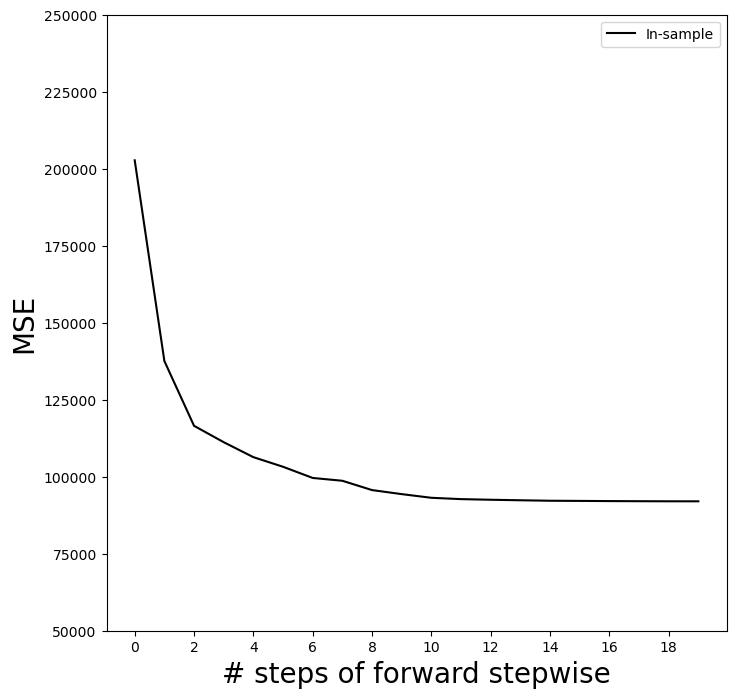

In [8]:
mse_fig, ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)   ## 학습할 때 사용한 데이터에서의 mse, 반대는 outsample
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps), insample_mse,
        'k', # color black
        label='In-sample')
ax.set_ylabel('MSE', fontsize=20)
ax.set_xlabel('# steps of forward stepwise', fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
ax.set_ylim([50000,250000]);

### D. 교차검증오차의 활용

In [9]:
## 10-fold CV를 통해 예측된 값들을 모아높음
K=10
kfold = skm.KFold(K, random_state=0, shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path, Hitters, Y, cv=kfold)
print(Yhat_cv.shape)

(263, 20)


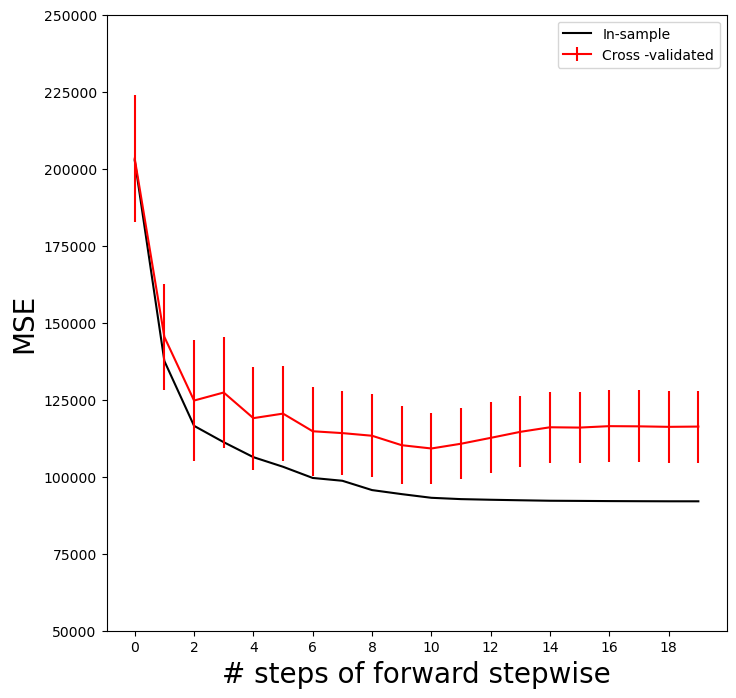

In [10]:
## 교차검증오차를 산출
cv_mse = []
for train_idx, test_idx in kfold.split(Y):
  errors = (Yhat_cv[test_idx] - Y[test_idx ,None])**2
  cv_mse.append(errors.mean(0)) # column means
  
cv_mse = np.array(cv_mse).T
cv_mse.shape

ax.errorbar(np.arange(n_steps),
cv_mse.mean(1),
cv_mse.std(1) / np.sqrt(K), # 교차검증오차의 표준오차
label='Cross -validated', c='r')
ax.set_ylim ([50000 ,250000])
ax.legend()
mse_fig

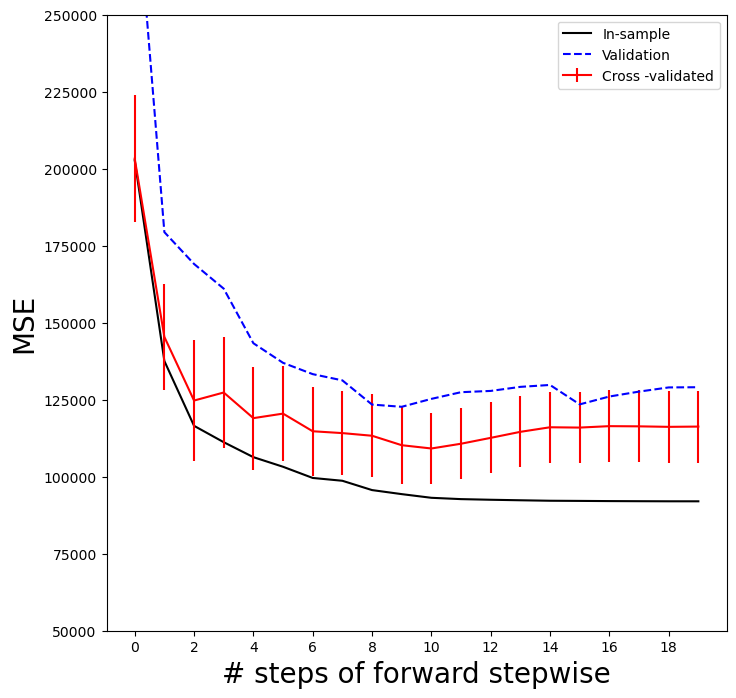

In [11]:
validation = skm.ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)  ## test set. 중첩성 완전 배제

for train_idx, test_idx in validation.split(Y):
  full_path.fit(Hitters.iloc[train_idx], Y[train_idx])
  Yhat_val = full_path.predict(Hitters.iloc[test_idx])
  errors = (Yhat_val - Y[test_idx ,None])**2  ## 예측오차의 과대추정 존재(훈련 데이터가 더 작음)
  validation_mse = errors.mean(0)

ax.plot(np.arange(n_steps), validation_mse, 'b--', # color blue, broken line
        label='Validation')
ax.set_xticks(np.arange(n_steps)[::2])
ax.set_ylim ([50000 ,250000])
ax.legend()
mse_fig

### E. Shrinkage

`-` LASSO

In [12]:
D = design.fit_transform(Hitters)   ## fit_transform하면 절편 열이 포함됨
D = D.drop('intercept', axis=1)     ## 절편은 제거
X = np.asarray(D)
path = fit_path(X, Y, max_nonzeros=X.shape[1]) ## callable

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  2
Iteration: 3. Number of non-zeros:  2
Iteration: 4. Number of non-zeros:  2
Iteration: 5. Number of non-zeros:  3
Iteration: 6. Number of non-zeros:  3
Iteration: 7. Number of non-zeros:  4
Iteration: 8. Number of non-zeros:  9
Iteration: 9. Number of non-zeros:  9
Iteration: 10. Number of non-zeros:  9
Iteration: 11. Number of non-zeros:  9
Iteration: 12. Number of non-zeros:  9
Iteration: 13. Number of non-zeros:  9
Iteration: 14. Number of non-zeros:  9
Iteration: 15. Number of non-zeros:  9
Iteration: 16. Number of non-zeros:  9
Iteration: 17. Number of non-zeros:  9
Iteration: 18. Number of non-zeros:  17
Iteration: 19. Number of non-zeros:  19


> Shrinkage를 할 때, $\beta_0$까지 패널티 항에 포함시키진 않음 ㅇㅅㅇ. 절편은 별도로 취급.

In [13]:
path[8]

{'B': array([  -1.20831273,    4.64432264,    0.        ,    0.        ,
           0.        ,    4.59805059,  -11.6699466 ,    0.        ,
           0.        ,    0.        ,    0.58710796,    0.54935239,
          -0.45671348,    0.        , -126.39657952,    0.26498974,
           0.        ,    0.        ,    0.        ]),
 'B0': 131.78366110767536,
 'lambda_0': 0.000639263714808348,
 'M': 0.5574849768321161,
 'Time_exceeded': False}

`-` RIDGE

In [14]:
Xs = X - X.mean(0)[None ,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None ,:]

lambdas = 10**np.linspace(8, -2, 100) / Y.std() ## grid setting
soln_array = skl.ElasticNet.path(Xs, Y, l1_ratio=0., alphas=lambdas)[1]

/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64428165.36474803, tolerance: 12885.7065737425
  model = cd_fast.enet_coordinate_descent_gram(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate

In [15]:
print(soln_array.shape)
soln_array[:,1]

(19, 100)


array([ 1.00986867e-03,  1.12218451e-03,  8.77500619e-04,  1.07404833e-03,
        1.14976205e-03,  1.13546702e-03,  1.02491916e-03,  1.34591009e-03,
        1.40417132e-03,  1.34282963e-03,  1.43939179e-03,  1.45036098e-03,
        1.25301523e-03, -3.65276406e-05, -4.92486247e-04,  7.68675675e-04,
        6.50694021e-05, -1.38170424e-05, -7.24531429e-06])

In [16]:
soln_path = pd.DataFrame(soln_array.T, columns=D.columns, index=-np.log(lambdas))   ## lambda가 클수록 음수
soln_path.index.name = 'negative log(lambda)'
soln_path

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League[N],Division[W],PutOuts,Assists,Errors,NewLeague[N]
negative log(lambda),,,,,,,,,,,,,,,,,,,
-12.310855,0.000800,0.000889,0.000695,0.000851,0.000911,0.000900,0.000812,0.001067,0.001113,0.001064,0.001141,0.001149,0.000993,-0.000029,-0.000390,0.000609,0.000052,-0.000011,-0.000006
-12.078271,0.001010,0.001122,0.000878,0.001074,0.001150,0.001135,0.001025,0.001346,0.001404,0.001343,0.001439,0.001450,0.001253,-0.000037,-0.000492,0.000769,0.000065,-0.000014,-0.000007
-11.845686,0.001274,0.001416,0.001107,0.001355,0.001451,0.001433,0.001293,0.001698,0.001772,0.001694,0.001816,0.001830,0.001581,-0.000046,-0.000621,0.000970,0.000082,-0.000017,-0.000009
-11.613102,0.001608,0.001787,0.001397,0.001710,0.001831,0.001808,0.001632,0.002143,0.002236,0.002138,0.002292,0.002309,0.001995,-0.000058,-0.000784,0.001224,0.000104,-0.000022,-0.000012
-11.380518,0.002029,0.002255,0.001763,0.002158,0.002310,0.002281,0.002059,0.002704,0.002821,0.002698,0.002892,0.002914,0.002517,-0.000073,-0.000990,0.001544,0.000131,-0.000028,-0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.784658,-290.823989,336.929968,37.322686,-59.748520,-26.507086,134.855915,-17.216195,-387.775826,89.573601,-12.273926,476.079273,257.271255,-213.124780,31.258215,-58.457857,78.761266,53.622113,-22.208456,-12.402891
10.017243,-290.879272,337.113713,37.431373,-59.916820,-26.606957,134.900549,-17.108041,-388.458404,89.000707,-12.661459,477.031349,257.966790,-213.280891,31.256434,-58.448850,78.761240,53.645147,-22.198802,-12.391969
10.249827,-290.923382,337.260446,37.518064,-60.051166,-26.686604,134.936136,-17.022194,-388.997470,88.537380,-12.971603,477.791860,258.523025,-213.405740,31.254958,-58.441682,78.761230,53.663357,-22.191071,-12.383205


> $\lambda$가 작을 때(OLS에 가까울 때), 회귀계수 간 차이가 거의 동일한 상황이 존재(`AtBat`, `Hits`같이 상관계수가 높은 것들)
>
> 변수 간 다중공선성이 있을 때, 계수 합은 일정하나 계수 자체의 분산이 상당히 커진다.

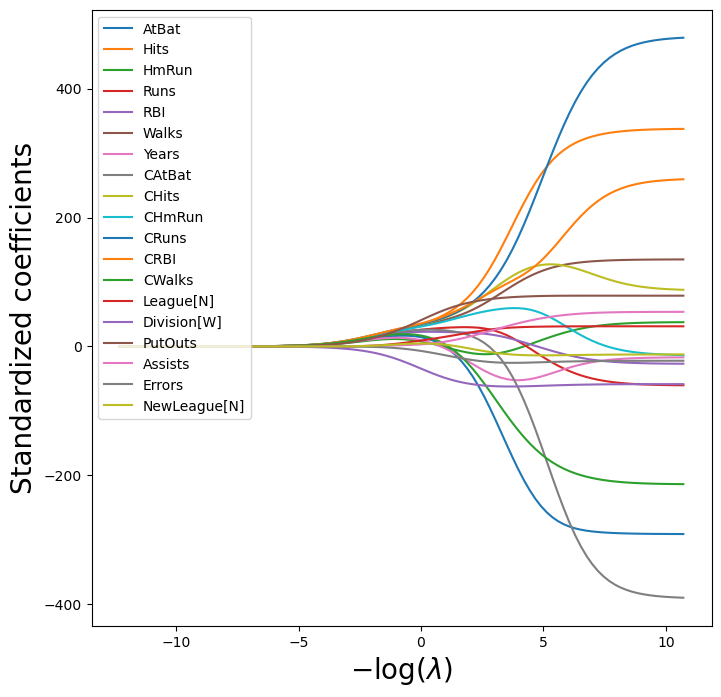

In [17]:
path_fig , ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [18]:
## 그냥 추정된 회귀계수의 제곱합 계산해봄
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True , with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)
np.linalg.norm(ridge.coef_)

/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+07, tolerance: 5.332e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


160.42371017725904

In [19]:
## train / validation set을 나눠 검증 오차 계산
validation = skm.ShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
ridge.alpha = 1e1
results = skm.cross_validate(ridge, X, Y, scoring='neg_mean_squared_error', cv=validation)  ## 클 수록 좋게
print(-results['test_score'])

[132790.68707108]


/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.737e+06, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
## 가장 좋은 초매개변수의 값을 validation set을 이용하여 찾음. 
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe, param_grid, cv=validation, scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']

/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemen

0.005899006046740856

In [21]:
print(grid.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.005899006046740856, l1_ratio=0))])


In [22]:
?skm.GridSearchCV

Init signature:
skm.GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or lis

In [23]:
grid = skm.GridSearchCV(pipe,
param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose = 0)
grid.fit(X, Y)
grid.best_params_['ridge__alpha']

/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+07, tolerance: 4.672e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.202e+07, tolerance: 4.404e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemen

/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.399e+07, tolerance: 4.799e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.506e+07, tolerance: 5.012e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemen

0.01185247763144249

`-` 교차검증오차(CV error)의 도표화

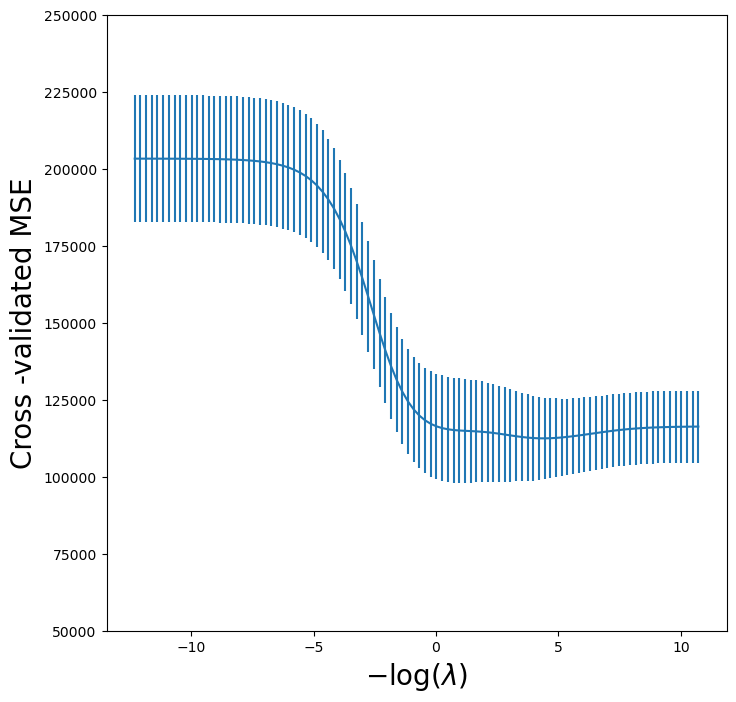

In [24]:
ridge_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
-grid.cv_results_['mean_test_score'],
yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylim ([50000 ,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated MSE', fontsize=20);

> 분산이 상당히 크기 때문에, 1-se rule을 적용한다면 상당히 작은 lambda를 택하게 될 것

`-` path 알고리즘으로 더 빠른 초매개변수 튜닝

In [25]:
grid_r2 = skm.GridSearchCV(pipe, param_grid, cv=kfold) ## r_square는 잘 안쓰는 게 좋음
grid_r2.fit(X, Y)

/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+07, tolerance: 4.672e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.202e+07, tolerance: 4.404e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemen

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge',
                                        ElasticNet(alpha=10.0, l1_ratio=0))]),
             param_grid={'ridge__alpha': array([2.22093791e+05, 1.76005531e+05, 1.39481373e+05, 1.10536603e+05,
       8.75983676e+04, 6.94202082e+04, 5.50143278e+04, 4.35979140e+04,
       3.45506012e+04, 2.73807606e+04, 2.1...
       4.67486141e-03, 3.70474772e-03, 2.93594921e-03, 2.32668954e-03,
       1.84386167e-03, 1.46122884e-03, 1.15799887e-03, 9.17694298e-04,
       7.27257037e-04, 5.76338765e-04, 4.56738615e-04, 3.61957541e-04,
       2.86845161e-04, 2.27319885e-04, 1.80147121e-04, 1.42763513e-04,
       1.13137642e-04, 8.96596467e-05, 7.10537367e-05, 5.63088712e-05,
       4.46238174e-05, 3.53636122e-05, 2.80250579e-05, 2.22093791e-05])})

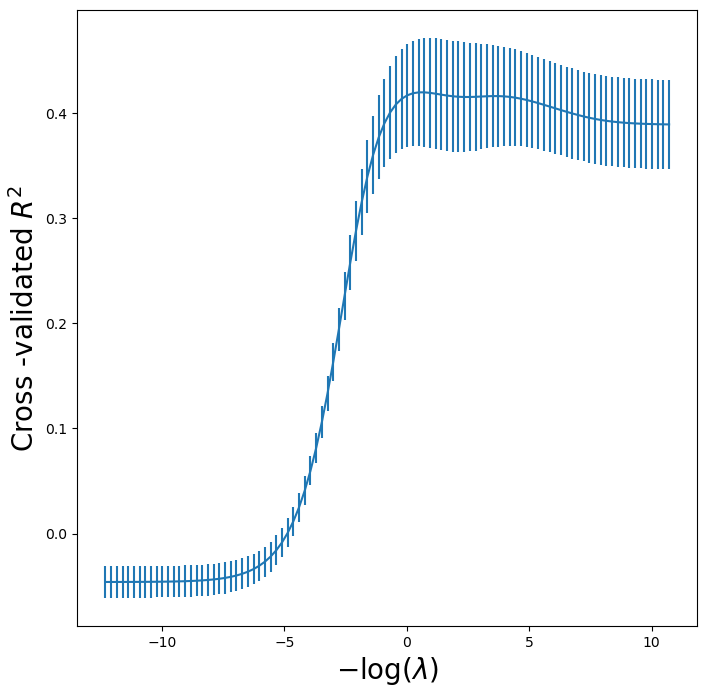

In [26]:
r2_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
grid_r2.cv_results_['mean_test_score'],
yerr = grid_r2.cv_results_['std_test_score'] / np.sqrt(K)
)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated $R^2$', fontsize=20);

`-` CV error로 초매개변수 선택

In [27]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas, l1_ratio=0, cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])
pipeCV.fit(X, Y)

/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23360008.183749244, tolerance: 4672.060092440772
  model = cd_fast.enet_coordinate_descent_gram(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordina

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([2.22093791e+05, 1.76005531e+05, 1.39481373e+05, 1.10536603e+05,
       8.75983676e+04, 6.94202082e+04, 5.50143278e+04, 4.35979140e+04,
       3.45506012e+04, 2.73807606e+04, 2.16987845e+04, 1.71959156e+04,
       1.36274691e+04, 1.07995362e+04, 8.55844774e+03, 6.78242347e+03,
       5.37495461e+03, 4.25955961e+03,...
       1.84386167e-03, 1.46122884e-03, 1.15799887e-03, 9.17694298e-04,
       7.27257037e-04, 5.76338765e-04, 4.56738615e-04, 3.61957541e-04,
       2.86845161e-04, 2.27319885e-04, 1.80147121e-04, 1.42763513e-04,
       1.13137642e-04, 8.96596467e-05, 7.10537367e-05, 5.63088712e-05,
       4.46238174e-05, 3.53636122e-05, 2.80250579e-05, 2.22093791e-05]),
                              cv=KFold(n_splits=10, random_state=0, shuffle=True),
                              l1_ratio=0))])

(112362.26398006322,
 array([-222.80877051,  238.77246614,    3.21103754,   -2.93050845,
           3.64888723,  108.90953869,  -50.81896152, -105.15731984,
         122.00714801,   57.1859509 ,  210.35170348,  118.05683748,
        -150.21959435,   30.36634231,  -61.62459095,   77.73832472,
          40.07350744,  -25.02151514,  -13.68429544]))

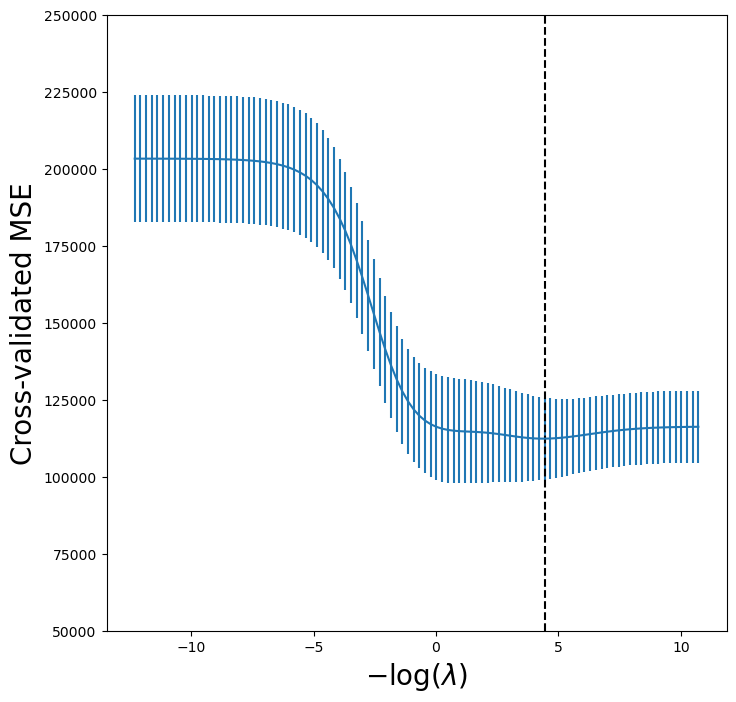

In [28]:
tuned_ridge = pipeCV.named_steps['ridge'] ## 튜닝 결과
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
tuned_ridge.mse_path_.mean(1),
yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_ylim ([50000 ,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

np.min(tuned_ridge.mse_path_.mean(1)), tuned_ridge.coef_

In [29]:
outer_valid = skm.ShuffleSplit(n_splits=1, test_size=0.25, random_state=1)
inner_cv = skm.KFold(n_splits=5, shuffle=True,random_state=2)
ridgeCV = skl.ElasticNetCV(alphas=lambdas, l1_ratio=0, cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)]);
results = skm.cross_validate(pipeCV, X, Y, cv=outer_valid, scoring='neg_mean_squared_error')

/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16002961.89304734, tolerance: 3200.6325551004934
  model = cd_fast.enet_coordinate_descent_gram(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/root/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/linear_model/_coordina

In [ ]:
-results['test_score'] ## 기존에 음수 취해줬으니 역으로

array([132393.84003227])

`-` Lasso 회귀분석

In [ ]:
import sklearn.preprocessing as skp
scaler = skp.StandardScaler()

lassoCV = skl.ElasticNetCV(n_alphas=100, l1_ratio=1, cv=kfold)  ## l1_ratio만 사용. CV는 이미 하고, 최적의 결과를 산출
pipeCV = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_ ## 선택된 초매개변수 값?

2.9351237625863815

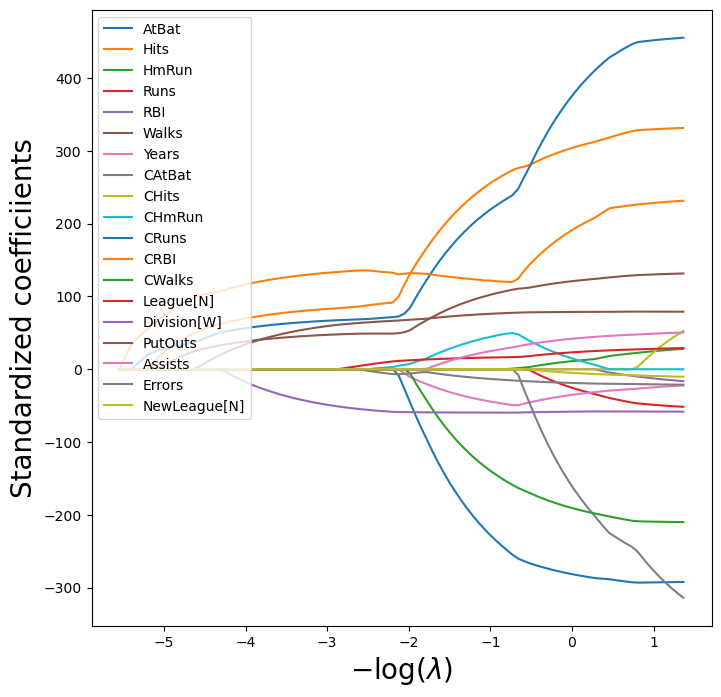

In [32]:
lambdas, soln_array = skl.Lasso.path(Xs, Y, l1_ratio=1, n_alphas =100)[:2]
soln_path = pd.DataFrame(soln_array.T, columns=D.columns, index=-np.log(lambdas))
path_fig , ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

In [ ]:
np.min(tuned_lasso.mse_path_.mean(1)) ## Lasso에서의 MSE 최소값

111643.39348122066

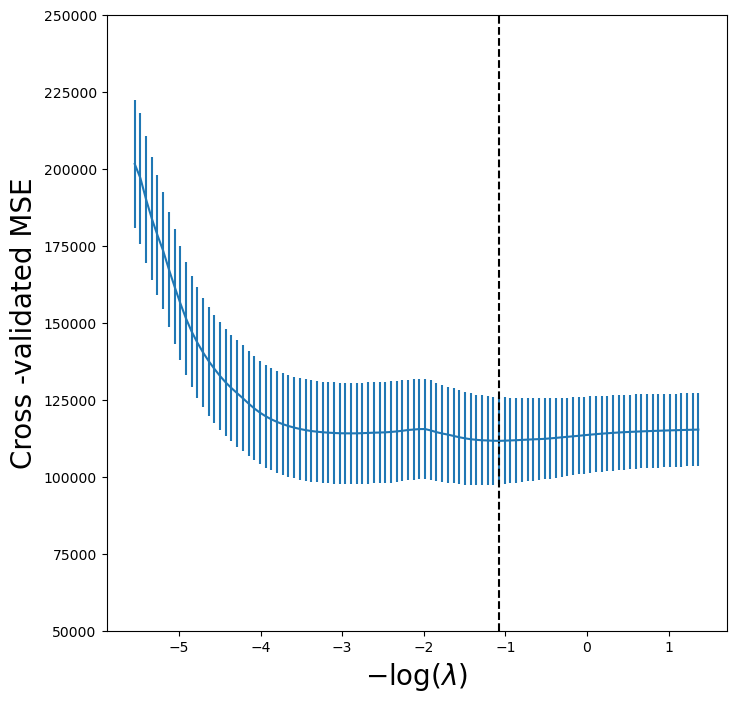

In [34]:
lassoCV_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
tuned_lasso.mse_path_.mean(1),
yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim ([50000 ,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated MSE', fontsize=20);

> 1-se rule의 경우 약간의 함수가 동원되어야 함. 근데 이것도 모듈에 있지 않을까?
>
> 검색해보면 나오니까 알아서 찾아서 사용하면 됨 ㅇㅇ

### F. 주성분 회귀 PCR

`-` 주성분 분석을 통해 얻은 주성분을 이용하여 회귀분석

In [ ]:
pca = PCA(n_components=2) ## PC1, 2만 선택
linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca), ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_  # PC 2개로 회귀분석을 진행

array([0.09846131, 0.4758765 ])

In [37]:
pipe = Pipeline([('scaler', scaler), ## scale을 조정해줘야 함
('pca', pca),
('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_ # 표준화 이후 회귀분석을 진행

array([106.36859204, -21.60350456])

In [38]:
param_grid = {'pca__n_components': range(1, 20)}
grid = skm.GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

> 파이프라인이 대충 어떻게 생겼다.|

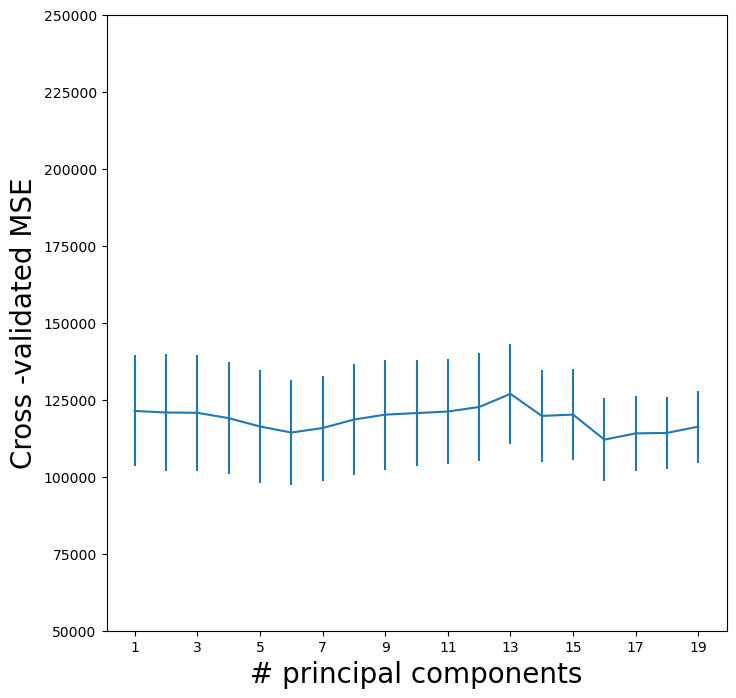

In [39]:
pcr_fig , ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp, -grid.cv_results_['mean_test_score'], grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross -validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp [::2])
ax.set_ylim ([50000 ,250000]);

> 1-se rule을 적용하면 PC1만 사용해도 상관 없을 것 같음. 13에서 살짝 걸리긴 하나, 아무튼.

In [40]:

pipe.named_steps['pca'].explained_variance_ratio_

array([0.3831424 , 0.21841076])

### G. PLS

In [41]:
pls = PLSRegression(n_components=2, scale=True)
pls.fit(X, Y)

param_grid = {'n_components':range(1, 20)}
grid = skm.GridSearchCV(pls, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

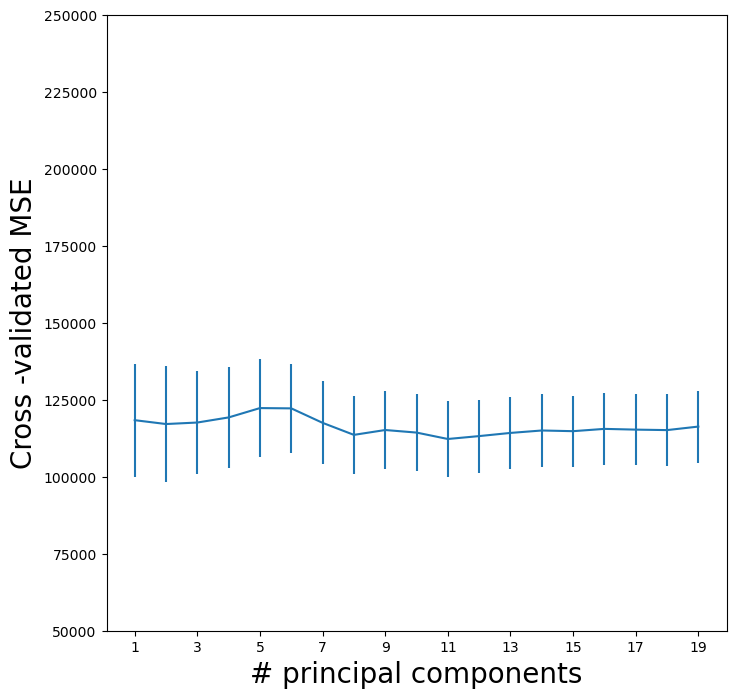

In [42]:
pls_fig , ax = subplots(figsize=(8,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp ,
-grid.cv_results_['mean_test_score'],
grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross -validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp [::2])
ax.set_ylim ([50000 ,250000]);

> 성능이 썩 좋지는 않음 ㅇㅅㅇ

**CV로 minimum 찾고, 1-se rule 쓰는 것, hyperparameter 찾는 거**